In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import dfca as DFCA
import ifca as IFCA

import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
rc = ipp.Cluster(n=3).start_and_connect_sync()
rc.activate()

rc.ids 

dview = rc[:]

Starting 3 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/3 [00:00<?, ?engine/s]

In [3]:
learning_rates = [0.25]

dfca_li = []
dfca_gi = []
ifca = []

In [4]:
%%px --targets all

import sys
import os
import random
sys.path.append(os.getcwd())

random.seed(42)
seeds = random.sample(range(10000), 5)
learning_rates = [0.25]

dfca_li = []
dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [ ]:
%%px --target 0 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_gi.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-LI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainEMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



<AsyncResult(%px): pending>

Running the dfca-li experiment


In [6]:
%%px --target 1 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config_dfca_li.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-LI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainEMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_li.append(res_mean)



<AsyncResult(%px): pending>

Running the ifca experiment

In [7]:
%%px --target 2 --noblock
import ifca as IFCA
import json
import time
import torch
import numpy as np

with open("config_ifca.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------IFCA, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = IFCA.TrainEMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ifca.append(res_mean)



<AsyncResult(%px): pending>

Experiment Final Results: 

IFCA outputs

In [8]:
rc.wait_interactive()
_.display_outputs()

dfca_gi = rc[0].pull('dfca_gi', block=True)
dfca_li = rc[1].pull('dfca_li', block=True)
ifca = rc[2].pull('ifca', block=True)

unknown:   0%|          | 0/3 [00:00<?, ?tasks/s]

---------------------------------IFCA, lr: 0.25, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'uneven': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_ifca'}
Using device: cuda
Epoch -1 tr: l 3.867 a 0.020 clct[np.int64(132), np.int64(68)] cl_acc 0.560  4.104sec
Epoch -1 tst: l 3.867 a 0.022 clct[np.int64(22), np.int64(18)] cl_acc 0.650  1.644sec
Epoch 0 tr: l 2.922 a 0.266 clct[np.int64(99), np.int64(101)] cl_acc 0.985  lr 0.250000 17.391sec(train) 2.451sec(infer)
Epoch 0 tst: l 2.954 a 0.259 clct[np.int64(20), np.int64(20)] cl_acc 1.000  0.464sec
result written at output_ifca/results.pickle
checkpoint written at output_ifca/checkpoint.pt
Epoch 1 tr: l 1.648 a 0.608 clct[np.int64(99), np.int64(101)] cl_acc 0.995  lr 0.248750 12.786sec(train) 2.975sec(infer)
Epoch 1 tst: l 1.669 a 0.603 clct[np.int64(20), np.int64(20)] cl_a

DFCA-LI outputs

In [9]:
__.display_outputs()

---------------------------------DFCA-LI, lr: 0.25, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'uneven': True, 'local_model_init': True, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_dfca_li'}
Using device: cuda
Epoch -1 tr: l 3.867 a 0.023 clct[np.int64(84), np.int64(116)] cl_acc 0.550  7.111sec
Epoch -1 tst: l 3.864 a 0.026 clct[np.int64(20), np.int64(20)] cl_acc 0.650  3.498sec
Epoch 0 tr: l 3.384 a 0.239 clct[np.int64(134), np.int64(66)] cl_acc 0.510  lr 0.250000 11.991sec(train) 4.924sec(infer)
Epoch 0 tst: l 3.680 a 0.139 clct[np.int64(23), np.int64(17)] cl_acc 0.675  2.028sec
result written at output_dfca_li/results.pickle
checkpoint written at output_dfca_li/checkpoint.pt
Epoch 1 tr: l 3.351 a 0.242 clct[np.int64(81), np.int64(119)] cl_acc 0.545  lr 0.248750 12.552sec(train) 4.875sec(infer)
Epoch 1 tst: l 3.549 a 0.172

DFCA-GI outputs

In [10]:
___.display_outputs()

---------------------------------DFCA-LI, lr: 0.25, seed: 1824---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'uneven': True, 'local_model_init': False, 'h1': 200, 'num_epochs': 300, 'batch_size': 100, 'tau': 5, 'lr': 0.25, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda
Epoch -1 tr: l 3.865 a 0.023 clct[np.int64(164), np.int64(36)] cl_acc 0.630  4.054sec
Epoch -1 tst: l 3.867 a 0.027 clct[np.int64(36), np.int64(4)] cl_acc 0.600  2.501sec
Epoch 0 tr: l 2.565 a 0.349 clct[np.int64(167), np.int64(33)] cl_acc 0.635  lr 0.250000 16.324sec(train) 2.413sec(infer)
Epoch 0 tst: l 2.948 a 0.261 clct[np.int64(33), np.int64(7)] cl_acc 0.675  1.702sec
result written at output_dfca_gi/results.pickle
checkpoint written at output_dfca_gi/checkpoint.pt
Epoch 1 tr: l 1.890 a 0.492 clct[np.int64(155), np.int64(45)] cl_acc 0.695  lr 0.248750 13.888sec(train) 3.021sec(infer)
Epoch 1 tst: l 2.412 a 0.375 

{'test_loss': [[3.866134331226349, 2.9131525421142577, 1.7564019030332567, 1.2891143438220023, 1.0625572302937507, 0.9228737941384315, 0.8225370593369007, 0.766127369850874, 0.7245241373777389, 0.6939847898483277, 0.6860924554616213, 0.6413308639824391, 0.6185711460933089, 0.6125027811154723, 0.5926819329336286, 0.5804247976839543, 0.5687363388016821, 0.5584229332953692, 0.5497889165207744, 0.5417099767550826, 0.5354851227067411, 0.5282578480802476, 0.5229761666432023, 0.5168445068318397, 0.5123727662861347, 0.507724832240492, 0.5035869513079524, 0.4996796174999326, 0.4964562952797859, 0.4932423691637814, 0.49063420971855515, 0.48761005969718096, 0.4857845042273402, 0.4821045741904527, 0.48097522361204026, 0.47753036305774, 0.4764128708280623, 0.47349385432433333, 0.47286611586809163, 0.47015866925474253, 0.4695125470450148, 0.4668233442865312, 0.46628117901738736, 0.46367585740052164, 0.46345482047181574, 0.46096390115097163, 0.460899168769829, 0.45855909640900794, 0.4586265085078775,

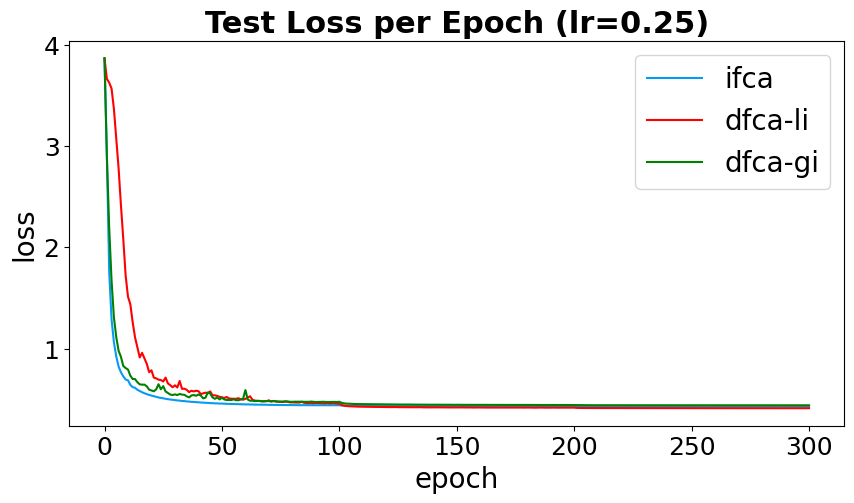

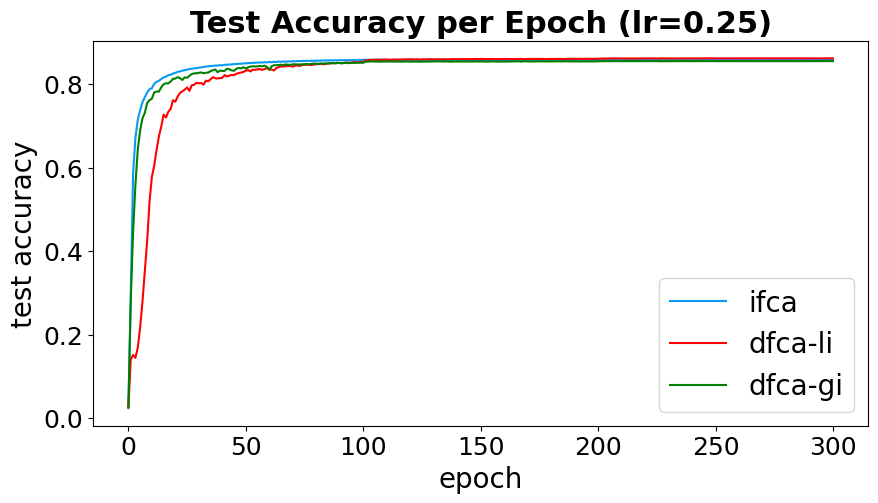

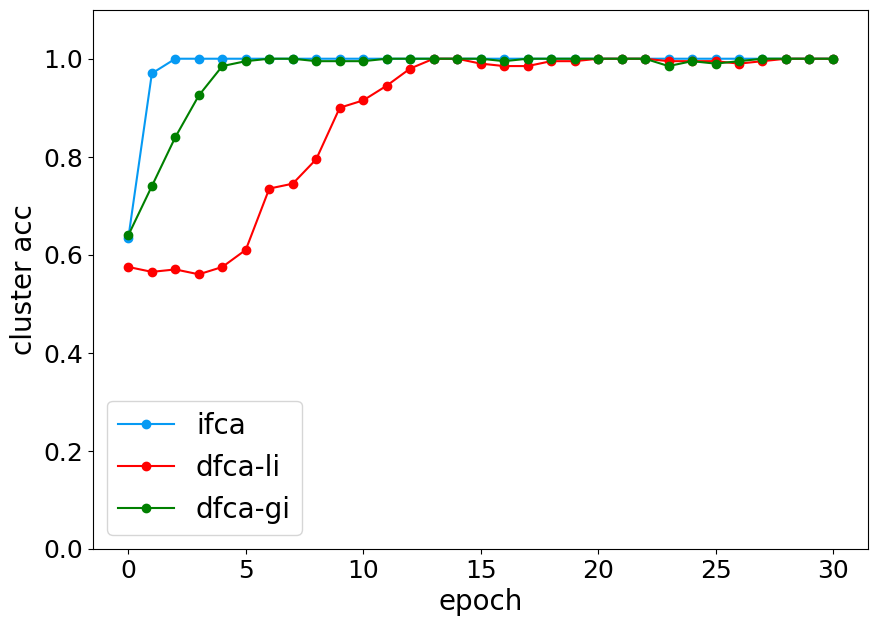

In [11]:

r_ifca = {}
r_dfca_gi = {}
r_dfca_li = {}

r_ifca['test_loss'] = []
r_ifca['test_acc'] = []
r_ifca['cl_acc'] = []
for i in range(len(learning_rates)):
    r_ifca['test_loss'].append(ifca[i][0])
    r_ifca['test_acc'].append(ifca[i][1])
    r_ifca['cl_acc'].append(ifca[i][2])

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])

r_dfca_li['test_loss'] = []
r_dfca_li['test_acc'] = []
r_dfca_li['cl_acc'] = []
for i in range(len(learning_rates)):
    r_dfca_li['test_loss'].append(dfca_li[i][0])
    r_dfca_li['test_acc'].append(dfca_li[i][1])
    r_dfca_li['cl_acc'].append(dfca_li[i][2])

print(r_ifca)

os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_loss'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_li['test_loss'][l], label='dfca-li', color='red')
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    plt.savefig(os.path.join('graphs', 'train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_ifca['test_acc'][l], label='ifca', color='xkcd:azure')
    plt.plot(r_dfca_li['test_acc'][l], label='dfca-li', color='red')
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('test accuracy', fontsize=20)
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    plt.savefig(os.path.join('graphs', 'test_acc.png'))

    plt.figure(figsize=(10,7))
    plt.ylim([0, 1.1])
    plt.plot(r_ifca['cl_acc'][l][:31], label='ifca', color='xkcd:azure', marker='o')
    plt.plot(r_dfca_li['cl_acc'][l][:31], label='dfca-li', color='red', marker='o')
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green', marker='o')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('cluster acc', fontsize=20)
    plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.savefig(os.path.join('graphs', 'cluster_acc.png'))